<a href="https://colab.research.google.com/github/lalit-jamdagnee/Learning_ML/blob/main/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A *Support Vector Machine* **(SVM)** is a powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. It is one of the most popular models in Machine Learning. SVMs are particularly well suited for classification of complex small - or medium-sized datasets.

In this chapter we will look at some core concepts of SVMs, how to use them, and how they work

# Linear SVM Classification

The fundamental idea behind SVMs is best explained with some pictures below that shows part of the iris dataset. The two classes can be clearly be separated easily with a stright line (they are linearly separable). The left plot shows the decision boundaries of three possible linear classifers.

The solid sline in the plot on the right represents the decision boundary of an SVM classifier; this line not only separates the two classes but also stays as far away from the closest training instances as possible. You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes. This is called *large margin classification*.

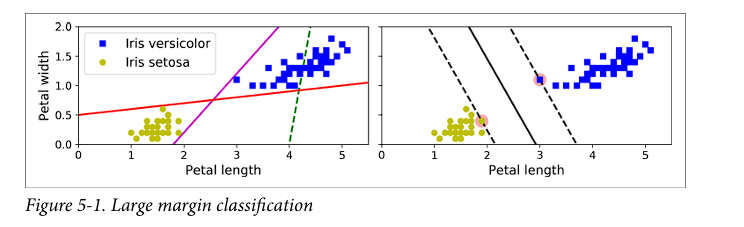

Notice that adding more training instances "off the street" will not affect the decsion boundary at all; it is fully determined (or "supported") by the instances located on teh edge of the street. These instances are called the *support vectors* ( they are circled in the figure below)

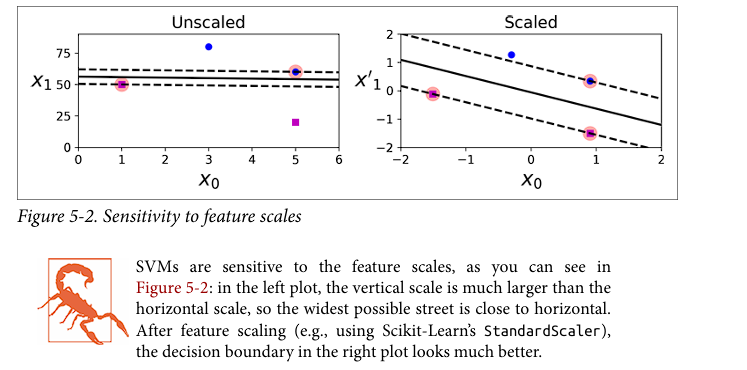

## Soft Margin Classification

If we strictly impose thatall instances must be off the street and on the right side, this is called *hard margin classification*. There are two main issues with hard margin classification. First, it only works if the data is linearly separable. Second, it is sensitive to the outlier. see the figure below:

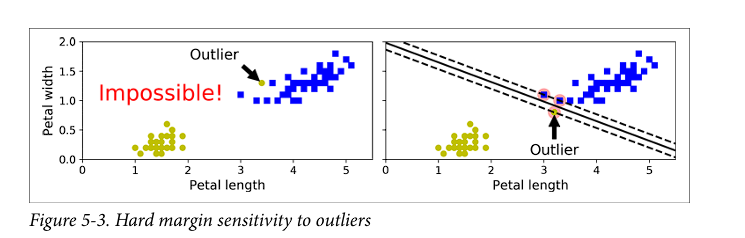

To avoid these issues, use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the *margin violations* (i.e., instances that end up in the middle of the street or even on the wrong side). This is called *soft margin classification*.

When creating an SVM model using Scikit-learn, we can specify a number of hyperparameters, C is one of those hyperparameters. If we set it to a low value, then we end up with model on the left (in figures below). With a high value, we get the model on the right.

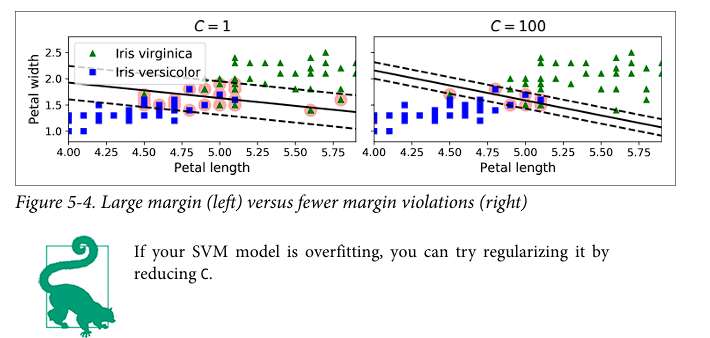

The following Scikit-learn code loads the iris dataset, scales the features, and then trains a linear SVM model (using the LinearSVC class with C=1 and hinge loss function, described shortly) to detect *Iris virginica* flowers:

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] #petal lenght, petal width
y = (iris['target'] == 2).astype('int') #1 if Iris virginica, else 0

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])

svm_clf.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1])

Unlike Logistic Regression classifiers, SVM classifiers do not output probabilities for each class.

Instead of suing the LinearSVC class, we could use the SVC class with linear kernel. When creating the SVC model, we would write **SVC(kernel="linear", C=1)**. Or we could use the **SGDClassifier** class, with **SGDClassifier(loss="hinge", alpha=1/(m*c))**. This applies regular Stochastic Gradient Descent to train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it can be useful to handle online classification tasks or huge datasets that do not fit in memory.

# Nonlinear SVM classification

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features, in some cases this can result in a linearly separable dataset. Consider the left plot in figure below; it represents a simple dataset with just one feature, x1. This dataset is not linearly separable, as you can see. But if you add a second feature x2 = (x1)^2, the resulting 2D dataset is perfectly linearly separable.

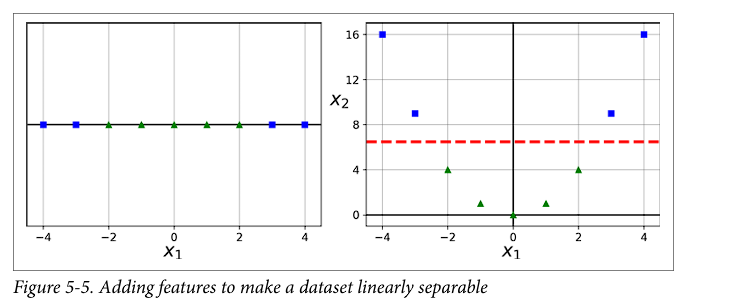

To implement this idea using Scikit-Learn, create a Pipeline containing a **PolynomialFeatures** transformer, followed by a **StandardScaler** and **LinearSVC**. Let's test this on the moons dataset: this is a toy dataset for binary classification in which the data points are shaped as two interleaving half circles. You can generate this dataset using the **make_moons()** function:

In [8]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=10, loss='hinge'))])

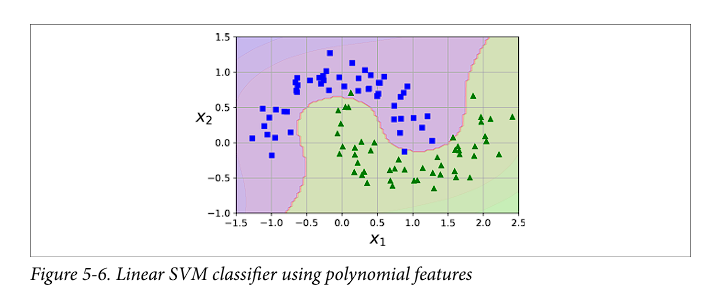

## Polynomial Kernel

Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms. That said, at a low polynomial degree, this method cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the odel too slow.

Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the *kernel trick*. The kernel trick makes it possible to get the same result as if ou had added many polynomial features, even with very high-degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features because you don't actually add any features. This trick is implemented by the SVC class. Let's test it on the moons dataset:

In [9]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

This code trains an SVM classifier using a third-degree polynomial kernel. It is represented in the figure on the left plot. On the right is another SVM classifier using a 10th degree polynomial kernel. Obviously, if your model is overfitting, you might want to reduce the polynomial degree. Conversely, if it is underfitting, you can try increasing it. THe hyperparameter coef0 controls how much the model is influenced by high-degree polynoilas versus low-degree polynomials.

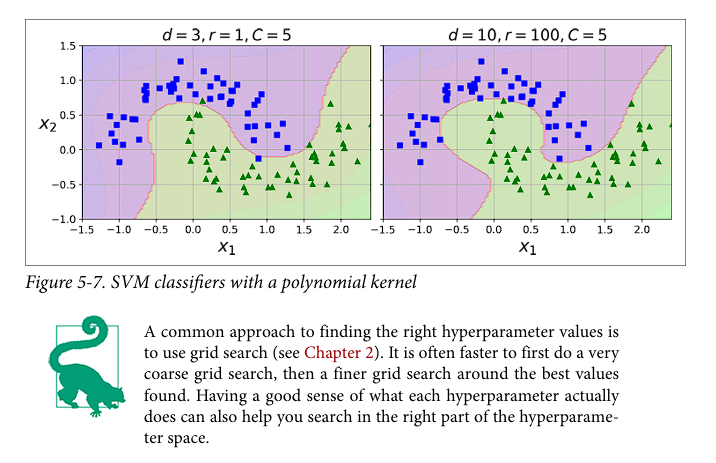

## Similarity Features

Another technique to tackle nonlinear problems is to add features computed using a *similarity function*, which measures how much each instance resembles a particular *landmark*. For example, let's take the 1D dataset discussed earlier and add two landmarks to it at x1 = -2 and x1 = 1 ( see the left plot in the figure). Next, let's define the similarity function to be the *Gaussian Radial Basis Function (RBF) with y= 0.3.

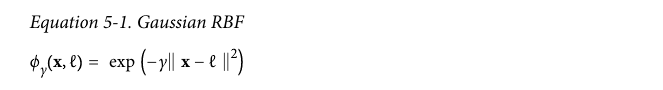

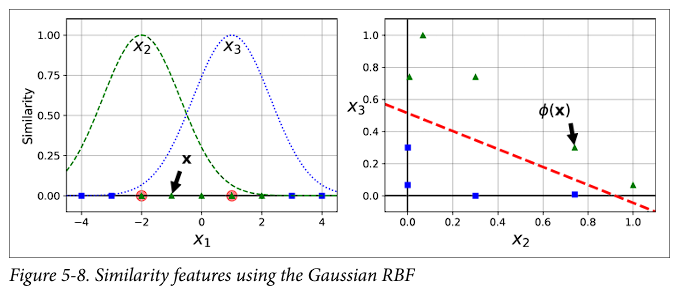

This is a bell-shaped function varying from 0 (very far from the landmark) to 1 (at the landmark). Now we are ready to compute the new features. For example, let's look at the instance x1 = -1. It is located at a distance of 1 from the first landmark and 2 from the second landmark. Therefore its new features are x2 = exp(-0.3 x 1^2) = 0.74 and x3 = exp(-0.3 x 2^2) = 0.30. The plot on the right shows the transformed dataset.

You may wonder how to select the landmarks. The simplest approach is to create landmark at the location of each and every instance in the dataset. Doing that creates many dimensions and thus increase the chance that the transformed training set will be linearly separable. The downside is that a training set with m instances and n features gets transformed into a training set with with m instances and m features. If your training set is very large, yo end up with an equally large number of features.

## Gaussian RBF Kernel

Just like the polynomial features method, the smiliarity features method can be useful with any Machine learning algorithm, but it may be computationally expensive to compute all the additional features, especially on large training sets. Once again the kernel trick does its SVM magic, making it possible to obtain a similar result as if you had added many similarity features. Let's try the SVC class with the Gaussian RBF Kernel:

In [10]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

This model is represented at the bottom left in the figure below. The other plots show models trained with different values of hyperparameter *gamma* (ʏ) and C. ʏ(gamma) acts like a regularization hyperparameter: if your model is overfitting, you should reduce it; if it is underfitting you should increas it (similar to the C hyperparameter)

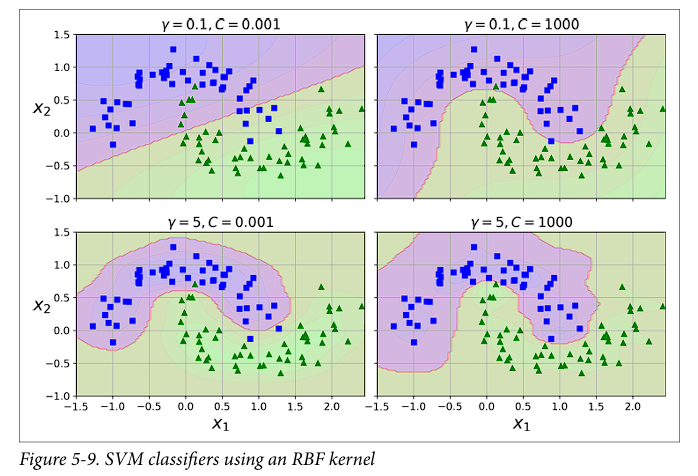

Other kernels exist but are used much more rarely. Some kernels are specialized for specific data structures. *String kernels* are sometimes used when classifying text documents or DNA sequences(e.g. using the *string subsequence kernel* or kernels based on the *Levenshtein distance*).

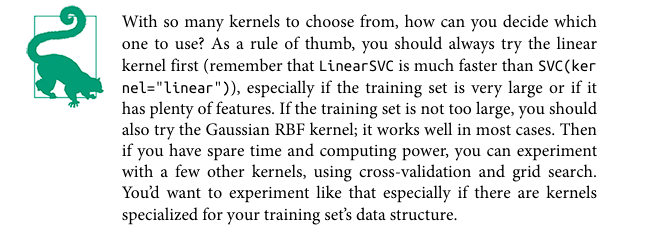

## Computational Complexity

The **LinearSVC** class is based on the *liblinear* library, which implements an optimized algorithm for linear SVMs. It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features. Its training time complexity is roughly o(m xn).

The **SVC** class is based on the *libsvm* library, which implements an algorithm that supports the kernel trick. The training time complexity is usually between O(m^2 x n) and O(m^3 x n). Unfortunately, this menas that it gets dreadfully slow when the number of training instances gets large. This algorithm is perfect for complex small or medium-sized training sets. It scales well with the number of features, especially with sparse features(i.e., when each instance has few nonzero features).

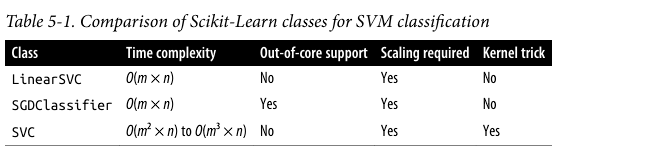

# SVM Regression

The SVM algorithm is versatile (i.e., it supports both regression and classification (linear and non linear)). To use SVMs for regression instead of classification, the objective is reversed instead of trying to fit the laregest possible street between the two classes as possible on the margin voilations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instancess off the street). The width of the street is controlled by a hyperparameter, ϵ. see the figure below for more reference.

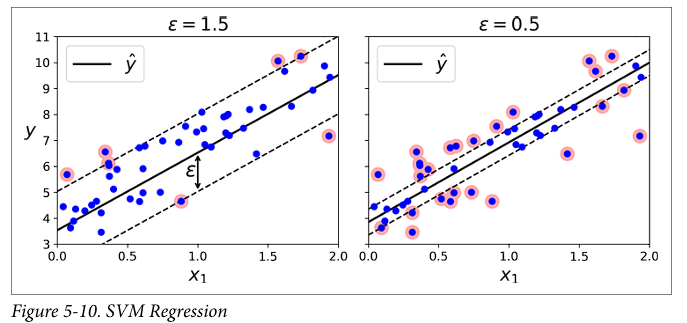

Adding more training instances within the margin does not affect the model's predictions; the model is said to be ϵ-insensitive.

Let's use Scikit-Learn's **LinearSVR** to perform linear SVM Regression

In [11]:
from sklearn.svm import LinearSVR

linear_svr = LinearSVR(epsilon=1.5)
linear_svr.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=1.5)

To deal with nonlinear regression, we can use a kernalised SVM model. The following code uses Scikit-Learns SVR class to produce the model in the figure's left plot:

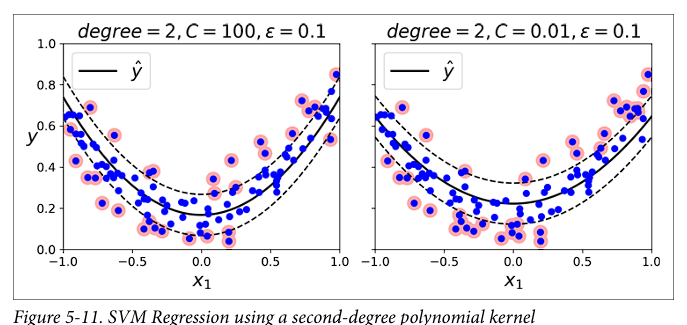

In [12]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

The SVR class is the regression equivalent of the SVC class, and the LinearSVR class is the regression equivalent of the LinearSVC class. The LinearSVR class scales linearly with the size of the training set (just like the LinearSVC class0, while the SVR class gets much too slow when training set grows large (just like the SVC class).

# Under the Hood

This section explains how SVMs make predictions and how their training algorithms work, starting with linear SVM classifiers. In this we will use b and w for bias and feature weights vectors as conventions.

## Decision Function and Predictions

The linear SVM classifier model predicts the class of a new instance x by simply computing the decision function image.png If the result is positive, the predicted class is positive class(1), and other wise it is the negative class (0);

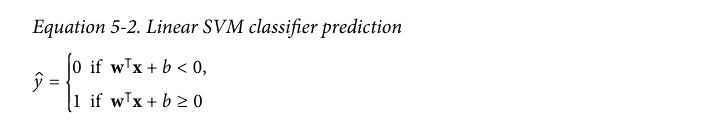

The figure below shows the decision function for the iris dataset having two features( petal width and petal length). The decision boundary is the set of points where the decision function is equal to 0: it is the intersection of two planes, which is a straight line

The dashed lines represent the points where the decision function is equal to 1 or -1: they are parallel and at equal distance to the decision boundary, and they form a margin around it. Training a linear SVM classifier means finding the values of w and b that make this margin as wide as possible while avoiding the margin violation (hard margin) or limiting them (soft margin).

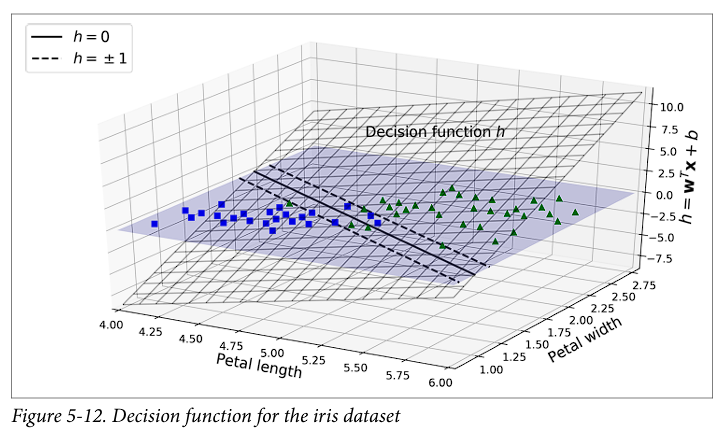

## Training Objective

Consider the slope of the decision function: it is equal to the norm of the weight vector, || **w** ||. If we divide this slope by 2, the points where the decision function is equal to +-1 are going to be twice as far away from the decision boundary. In other words, dividing the slope by 2 will mutliply the margin by 2. (see the figure below):

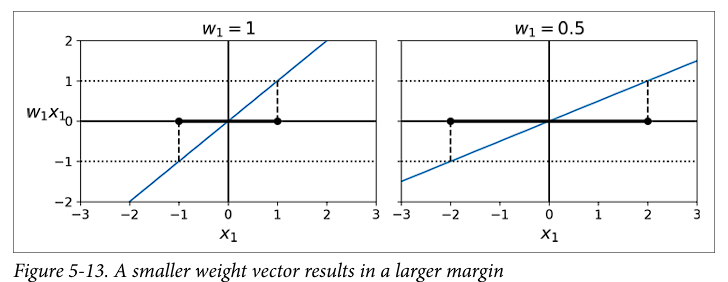

So we want to minimize || **w** || to get a large margin. If we also want to avoid any margin violations (hard margin), then we need the decision function to be greater than 1 for all positive training instance and lower than -1 for negative training instances.

To get the soft margin objective, consider the following scenario

Imagine you’re playing a game where you have to draw a line that separates two groups of points on a piece of paper. The goal is to draw the line so that it keeps the groups as far apart as possible. But sometimes, it’s really hard to draw a perfect line because some points are too close to the other group.

To make it easier, we use something called a slack variable. Think of it like a little helper that allows some points to be on the wrong side of the line, but not too many. The slack variable tells us how much each point is allowed to be on the wrong side.

Now, we have two goals:

* **Keep the slack variables small**: This means we want as few points as possible to be on the wrong side of the line.

* **Make the line as wide as possible**: This means we want the groups to be as far apart as possible.

There’s a special setting called C that helps us decide how much we care about each goal. If we set C high, we really want to keep the points on the right side. If we set C low, we care more about making the line wide.

In the end, we try to find the best balance between these two goals, which is like solving a puzzle. This puzzle is called an optimization problem. By solving it, we find the best line that separates the groups while allowing a few points to be on the wrong side if needed.

## Quadratic Programming

Imagine you're trying to do something like minimize your spending while shopping. But there's a twist - you have to follow certain rules, like only buying things that are on sale or within a budget. In math, this kind of problem is called an optimization problem.

In Quadratic Programming (QP), we're trying to minimize a mathematical function that has both squared terms (like x^2) and regular terms (like x). the squared part is what makes it 'quadratic'

**The QP Equation**:

The math version of this shopping problem is:

* **p** is like your shopping list- what you're trying to figure out.

* **H** is like a prices chart that changes based on how much you buy (this is the quadratic part).

* **f** is another cost, but it's simpler (this is linear part).

* *Ap >= b** means you have to follow certain rules, like only buying items on sale. Its saying that your shopping decisions have to meet these specific conditions.



In Machine learning, we often need to classify things - like telling the difference between cats and dogs in photos. An SVM is a tool that helps us draw the best line (or boundary) between these two groups.

* **Hard Margin SVM**: If everything is perfectly separable (like cats and dogs are on totally different sides), we can use a simpler version of QP to draw a straight line between them.

* **Soft Margin SVM**: But real life isn't perfect, right? Sometimes the cats and dogs are mixed up a bit. In this case, we allow some mistakes (soft margin) and use a slightly more complex QP to still draw a useful boundary.


In short Quadratic Programming is a fancy way of solving problems where you want to minimize something (like costs) while following some rules (like budgest). In machine learning, we use it to help machine slearn how to make decisions, like drawing boundaries between different groups in data.

## Dual Problem


Imagine you’re trying to solve a puzzle where you need to separate two groups of points on a graph with a straight line. This is what Support Vector Machines (SVMs) do. They find the best line (or hyperplane) that separates the groups with the largest margin.

The Primal Problem would be to find the best route to a destianation on a map i.e., finding the best line that seperatest the group with the largest margin.

The **Dual Problem** is an indirect approach to solving the problem, instead of solving the original(primal) problem directly, you can solve a different but related problem, called the dual problem. This is like finding a diferent route that stills get you to your destination, but possible more efficiently.

SOlving the dual problem can be easier or faster, and under certain conditions, it gives the same solution as the primal solution. THis is useful in SVMs, where solving the dual problem is often more efficient, especially when dealing with a large number of training instances.



The solution to the dual problem typically gives a lower bound to the solution of the primal problem, but under some condictions it can have the same solution as the primal problem. Luckily, the SVM problem happens to meet these conditions, so you can choose to solve the primal problem or the dual problem; both will have the same solution.

The dual problem is faster to solve than the primal one when the number of training instances is smaller than the number of features. More importantly, the dual problem makes the kernel trick possible, while the primal does not. So what is this kernel trick, anyway?

## Kernelized SVMs

SVMs are a type of machine learning learning model used for classification. Imagine uo have two groups of points on a 2d Plane (like red and blue dots), and you want to draw a straight line that best separates the two groups. This line is called a hyperplane. The goal of an svm is to find the hyperplane that maximizes the margin, which is the distance betSween the hyperplane and the closes points from each group.

**SVMs** can work great when the data can be separated by a straight line. But what if the data isn't linearly sepearable? For example, imagine the blue dots are inside a circle, and the red dots are outside. No straight line can seperate them.

**Transforming the Data**:

To handle this, we can transform the data into a hihger dimension where it becomes easier to seperate. For example, let's say you have a data point (x1, x2). In the original 2D space, you can't separate the points with a straight line. But if you transform the data to a 3D space using:



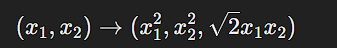

Now, in this 3D space, it might be possible to separate the points using a plane ( a flat surface in 3D), which corresponds to a curve in the orginal 2D space

**The Kernel Trick**:

Manually transforming every data point into a higher dimension can be complex and computationally expensive. This is where the **kernel trick** comes in. A **kernel function** computes the dot product ( a measure of similarity) between two points in the higher-dimensional space without actually computing their coordinates in that space. For example, consider the **polynomial kernel**:



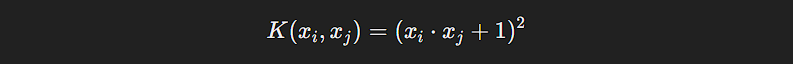

Here, xi.xj is the dot product of the original features. The Kernel function gives you the result as if you had transformed the data into the higher-dimensional space and then computed the dot product.

**Example**:

Imagine you have two points (1, 2) and (3, 4) in 2D space. The dot product in 2D is:

(1 x 3) + (2 x 4) = 3 + 8 = 11

If you use the polynomial kernel with degree 2:
  

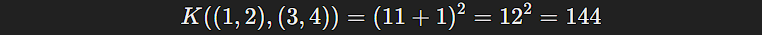

This result is as if you had transformed the points into a higher dimension and then computed their dot products.


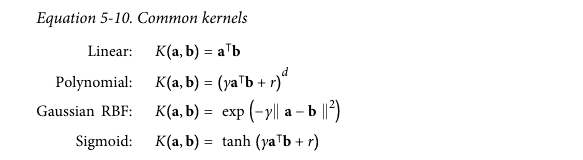

** Why use Kernels? **

Kernels let you work with data that's not linearly separable by mapping it into a higer dimensional space where it becomes easier to separate. You dont' have to manually transform the data; the kernel function handles it behind the scenes, making the process much more efficient.


Kernelized SVMs use the kernel trick to handle more complex datasets that aren't linearly separable. By mapping data into a hihger dimension using a kernel function, they allow us to find a separating hyperplane (or decision boundary) in the transformed space, which corresponds to a more complex boundary in the original space. This makes SVMs powerful for a wide variety of classification tasks.

# Online SVMs

Before concluding this chapter, let's take a quick look at online SVM classifier (recal that online learning means learning incrementally, typically as new instances arrive).

For linear SVM classifiers, one method for implementing an online SVM classifier is to use Gradient Descent ( eg. using **SGDClassifier**) to minimize the cost function, which is derived from the primal problem. unfortunately, Gradient Descent converges much more slowly than the methods based on QP.


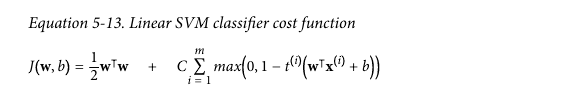

The first sum in the cost function will push the model to have a small weight vector w, leading to a larger margin. The second sum computes the total of all margin violations. An instance's margin violation is equal to 0 if it is located off the street and on the correct side, or else it is propotional to the distnace to the correct side of the street. Minimizing this term ensures that the model makes the margin violations as small and few as possible.

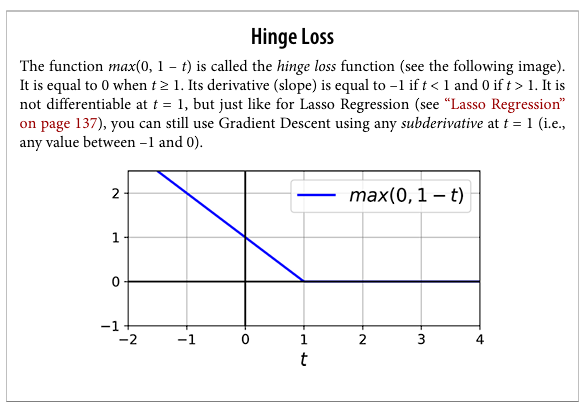